# Data Structure and Clustering

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
!pip install umap-learn
import umap
import string 
import time
from gensim import corpora
import gensim

In [43]:
ntopic = 2
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Celsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
!pip install stop_words

In [3]:
from stop_words import get_stop_words

stop_words = get_stop_words('en')

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV data into a DataFrame
data = pd.read_csv('D:/Plan B/ACG/WomensClothingECommerceReviews.csv')



In [8]:
# Split the data into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print("Training set shape:", train_data.shape)
print("Test set shape:", test_data.shape)


Training set shape: (18788, 11)
Test set shape: (4698, 11)


In [10]:
text_data = train_data['Review Text'].values.astype(str)
print("Text set shape:", text_data.shape)

Text set shape: (18788,)


In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
vectorizer = CountVectorizer(max_features=1000, lowercase=True, stop_words='english', max_df=0.8, min_df=5)
vectorized_data = vectorizer.fit_transform(text_data)
feature_names = vectorizer.get_feature_names_out()


In [12]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans


In [13]:
inertias = []
k_values = range(1, 20)  # Try different numbers of clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(vectorized_data)
    inertias.append(kmeans.inertia_)


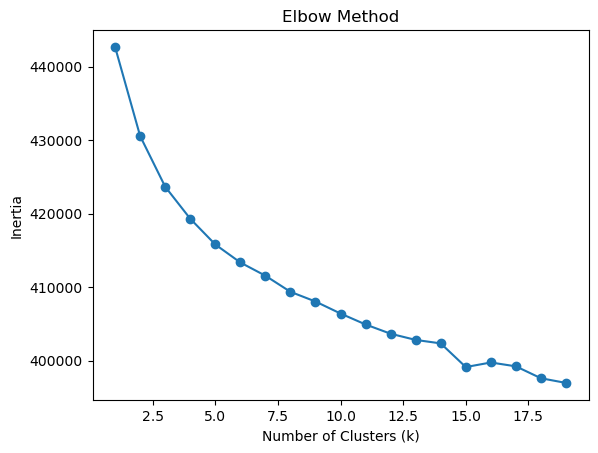

In [14]:
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


#was run separately in another notebook
inertias = []
k_values = range(1, 30)  # Try different numbers of clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(vectorized_data)
    inertias.append(kmeans.inertia_) 
 

# output from other notebook
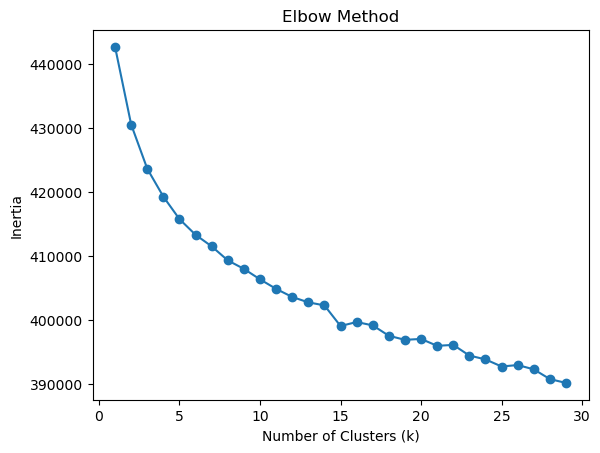

In [15]:
#vectorizer = TfidfVectorizer()
#tfidf_matrix = vectorizer.fit_transform(text_data)
from sklearn.metrics import silhouette_score

In [16]:
silhouette_scores = []
k_values = range(2, 12)  # Try different numbers of clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(vectorized_data)
    score = silhouette_score(vectorized_data, labels)
    silhouette_scores.append(score)



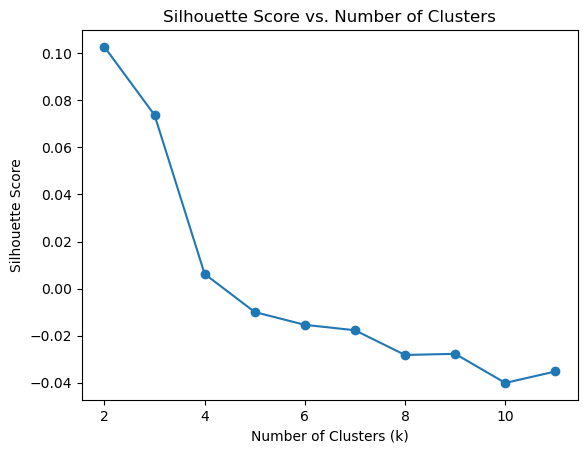

In [17]:
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()


£run in another notebook
silhouette_scores = []
k_values = range(2, 30)  # Try different numbers of clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(vectorized_data)
    score = silhouette_score(vectorized_data, labels)
    silhouette_scores.append(score)

 # output from another notebook
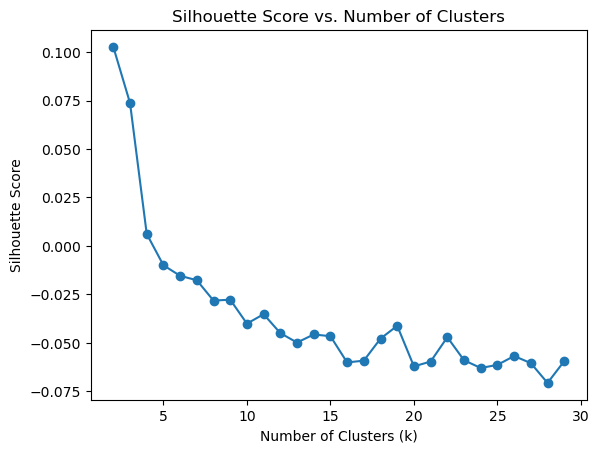

In [18]:
num_topics = 2  # Specify the desired number of topics
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(vectorized_data)


LatentDirichletAllocation(n_components=2, random_state=42)

In [59]:
num_words = 50  # Specify the number of top words to display for each topic
for topic_idx, topic in enumerate(lda_model.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
    print(f"Topic #{topic_idx+1}:")
    print(top_words)
    print()


Topic #1:
['dress', 'size', 'fit', 'small', 'ordered', 'like', 'just', 'love', 'wear', 'large', 'petite', 'waist', 'store', 'tried', 'medium', 'really', 'xs', 'usually', 'look', 'fabric', 'color', 'big', 'retailer', 'little', 'didn', 'online', 'beautiful', 'runs', 'bought', 'did', 'flattering', 'length', 'think', 'got', 'way', 'perfect', 'great', 'looked', 'cute', 'bit', 'try', 'tight', 'fits', 'loved', 'lbs', 'short', 'saw', 'regular', 'chest', 'pretty']

Topic #2:
['love', 'great', 'wear', 'like', 'fabric', 'soft', 'color', 'shirt', 'nice', 'perfect', 'looks', 'comfortable', 'just', 'sweater', 'look', 'little', 'fit', 'flattering', 'really', 'material', 'cute', 'jeans', 'fits', 'long', 'colors', 'bit', 'bought', 'sleeves', 'beautiful', 'black', 'quality', 'summer', 'white', 'good', 'length', 'super', 'work', 'size', 'pretty', 'pants', 'design', 'cut', 'fall', 'got', 'worn', 'style', 'true', 'jacket', 'light', 'skirt']



In [ ]:
#from sklearn.datasets import fetch_20newsgroups
#newsgroups_train = fetch_20newsgroups(subset='train')

In [20]:
#Append sentences from newsgroup documents to raw sentences
raw_sentences = []

#for s in newsgroups_train.data:
#  raw_sentences.append( s )
for s in text_data:
  raw_sentences.append( s )

In [21]:
import re


def only_letters(tested_string):
    for letter in tested_string:
        if letter not in "abcdefghijklmnopqrstuvwxyz":
            return False
    return True

#I just did an adhoc cleaning, as I see documents
#have some non English characters, so I use above method only_letters
#to filter instead of default isalpha python method
def clean_data(s): 
    s = s.replace(">","").lower()
    if "lines:" in s :
        index = s.index("lines:")
        s = s[index+10:] 
        
    word_list = word_tokenize(s)
    cleaned = []
    for w in word_list:
        if w not in stop_words:
            if w in string.punctuation or only_letters(w):
                if w in string.punctuation or len( set(w) ) > 1:
                    cleaned.append( w)
    return " ".join(cleaned) ,cleaned           
            

#from documents clean sentence and return vocublary of sentence
def build_data(docs):

    n_docs = len(docs)
    sentences = []  # sentences
    token_lists = []  # words vocublary
    
    for i in range(len(docs)):
        sentence,token_list = clean_data(docs[i])
        if token_list: #if not all items eleminated
            sentences.append(sentence)
            token_lists.append(token_list)
        
    return sentences, token_lists

In [22]:

print("Number of raw sentences ", len(raw_sentences))

Number of raw sentences  18788


In [23]:
print("Sample raw sentence \n", raw_sentences[10])

Sample raw sentence 
 Cute and different dress, cute with boots.very comfortable, runs large, could size down


In [24]:
print("First 10 raw sentences:")
for sentence in raw_sentences[:10]:
    print(sentence)


First 10 raw sentences:
I passed over this dress online thinking i'd never wear it. but, then i found myself inside an retailer store and decided to try it on. i am excited to say that i love this dress. it is soft and lovely. the cowl is large and the whole dress has a really great drape. my favorite thing is that the buttons along the back are functional. opening up the back turns this dress into a long cardigan that is to die for.
I am so excited about this swimsuit. i have never felt so good in a bathing suit. it's sexy without being too revealing. the fit is perfect. i absolutely love it!
To start: i'm 135 lbs, 5'7", 34c, 28 jeans, size 4 dress -- amazing skirt for an outstanding price! incredibly lightweight; has a stretchy-jersey lining. to fit high-waisted like the model, go down 1-2 sizes. in work slacks, i wear a size 6 or 8. however, my natural waist is small. i tried on the size 2 and the size 4. i purchased the size 2, although i still wish there was a size 0 to try on. a 

In [25]:
sentences, token_lists = build_data(raw_sentences )

In [26]:
print(len(sentences))


18788


In [27]:
print("Sentence after cleaning :\n", sentences[10])

Sentence after cleaning :
 cute different dress , cute comfortable , runs large , size


In [29]:
#get tfidf of documents
def get_tfidf_embedding(items):
  tfidf = TfidfVectorizer()
  embeddings = tfidf.fit_transform(items)
  return embeddings


In [30]:
#Generate embedding with tfidf
embedding_tf_idf = get_tfidf_embedding( sentences )
print("Shape of sentences applied tf-idf :", embedding_tf_idf.shape)

Shape of sentences applied tf-idf : (18788, 12019)


In [31]:

print("Type of tf-idf vector :", type( embedding_tf_idf[10] ) )
print("Sample of tf-idf vector :",  embedding_tf_idf[10] ) 
#you can see tf-idf scores for row 10

Type of tf-idf vector : <class 'scipy.sparse._csr.csr_matrix'>
Sample of tf-idf vector :   (0, 8793)	0.3608682181893396
  (0, 2037)	0.3050269465939601
  (0, 2865)	0.4336189321086822
  (0, 2546)	0.6152958896878019
  (0, 9398)	0.22546678500382647
  (0, 5655)	0.3240970265807069
  (0, 3146)	0.23290368615421633


In [32]:
def predict_topics_with_kmeans(embeddings,num_topics):
  kmeans_model = KMeans(num_topics)
  kmeans_model.fit(embeddings)
  topics_labels = kmeans_model.predict(embeddings)
  return topics_labels


    
def plot_embeddings(embedding, labels,title):

    labels = np.array( labels )
    distinct_labels =  set( labels )
    
    n = len(embedding)
    counter = Counter(labels)
    for i in range(len( distinct_labels )):
        ratio = (counter[i] / n )* 100
        cluster_label = f"cluster {i}: { round(ratio,2)}"
        x = embedding[:, 0][labels == i]
        y = embedding[:, 1][labels == i]
        plt.plot(x, y, '.', alpha=0.4, label= cluster_label)
    plt.legend(title="Topic",loc = 'upper left', bbox_to_anchor=(1.01,1))
    plt.title(title)
    

def reduce_umap(embedding):
  reducer = umap.UMAP() #umap.UMAP()
  embedding_umap = reducer.fit_transform( embedding  )
  return embedding_umap

def reduce_pca(embedding):
    pca = PCA(n_components=2)
    reduced = pca.fit_transform( embedding )
    print( "pca explained_variance_ ",pca.explained_variance_)
    print( "pca explained_variance_ratio_ ",pca.explained_variance_ratio_)
    
    return reduced

def reduce_tsne(embedding):
    tsne = TSNE(n_components=2)
    reduced = tsne.fit_transform( embedding )
    
    return reduced

In [39]:
pip install --upgrade threadpoolctl


  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0


In [33]:
#Apply kmeans to raw vectors
labels_tfidf_raw  = predict_topics_with_kmeans(embedding_tf_idf,num_topics)



In [34]:
print("Embedding Tf-idf shape :",embedding_tf_idf.shape)

Embedding Tf-idf shape : (18788, 12019)


In [35]:
#Apply kmeans to umap vectors
embedding_tf_idf_umap =  reduce_umap( embedding_tf_idf )
labels_tfidf_umap  = predict_topics_with_kmeans(embedding_tf_idf_umap,num_topics)



In [36]:
print("Embedding shape after umap",embedding_tf_idf_umap.shape)

Embedding shape after umap (18788, 2)


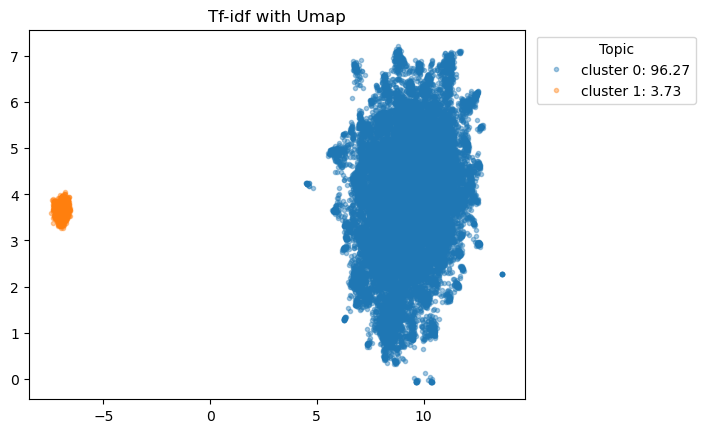

In [37]:
plot_embeddings(embedding_tf_idf_umap,labels_tfidf_umap,"Tf-idf with Umap")

D:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


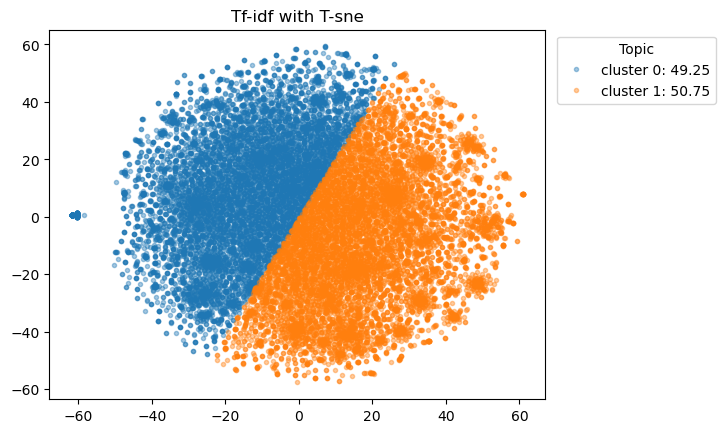

In [38]:
embedding_tf_idf_tsne =  reduce_tsne( embedding_tf_idf )
labels_tfidf_tsne  = predict_topics_with_kmeans(embedding_tf_idf_tsne,num_topics)

plot_embeddings(embedding_tf_idf_tsne,labels_tfidf_tsne,"Tf-idf with T-sne")

In [ ]:
#The silhouette value is a measure of how similar an object is to its own cluster compared to other clusters

In [ ]:
#The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. 
#Negative values generally indicate that a sample has 
#been assigned to the wrong cluster, as a different cluster is more similar.

In [39]:
print("Silhouette score:" )
print("without dim reduction :", silhouette_score(embedding_tf_idf , labels_tfidf_raw) )
print("with Tf-idf   Umap    :", silhouette_score(embedding_tf_idf_umap, labels_tfidf_umap) )
print("with Tf-idf   T-sne   :",  silhouette_score(embedding_tf_idf_tsne, labels_tfidf_tsne) )

Silhouette score:
without dim reduction : 0.0533950834239067
with Tf-idf   Umap    : 0.83816904
with Tf-idf   T-sne   : 0.33109218


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

# Assuming you have the 'sentences' variable containing preprocessed sentences

# Step 1: Create TF-IDF embeddings
vectorizerT = TfidfVectorizer()
tfidf_embeddingsnew = vectorizerT.fit_transform(sentences)

# Step 2: Perform clustering with K-means
num_clustersnow = 2  # Specify the number of clusters (topics)
kmeans_model1 = KMeans(n_clusters=num_clustersnow, random_state=42)
kmeans_model1.fit(tfidf_embeddingsnew)

# Step 3: Extract unique words for each cluster/topic
cluster_wordsnow = []
order_centroids = kmeans_model1.cluster_centers_.argsort()[:, ::-1]  # Order centroids by their TF-IDF values

for cluster_idx in range(num_clustersnow):
    word_indices = order_centroids[cluster_idx, :50]  # Get the top 10 words for each cluster
    cluster_wordsnow.append([vectorizerT.get_feature_names_out()[i] for i in word_indices])

# Step 4: Print the unique words associated with each cluster/topic
for cluster_idx, words in enumerate(cluster_wordsnow):
    print(f"Cluster #{cluster_idx + 1}:")
    print(words)
    print()


Cluster #1:
['nan', 'zuma', 'flight', 'flexors', 'flexibly', 'flexible', 'flexibility', 'flex', 'fleshy', 'flesh', 'fleetwoods', 'fleetwood', 'fleecy', 'fleece', 'flecks', 'flecking', 'flecked', 'flea', 'flax', 'flawy', 'flaws', 'flawlessly', 'flawless', 'flies', 'flights', 'flops', 'flimsy', 'flop', 'floored', 'floor', 'floofs', 'flood', 'flocked', 'floaty', 'floats', 'floating', 'float', 'flo', 'flirty', 'flirtiness', 'flirtier', 'flirt', 'flips', 'flipped', 'flipp', 'flip', 'flawed', 'flaw', 'flavor', 'flapping']

Cluster #2:
['dress', 'love', 'size', 'top', 'great', 'fit', 'like', 'wear', 'just', 'small', 'color', 'fabric', 'perfect', 'really', 'little', 'flattering', 'cute', 'comfortable', 'ordered', 'look', 'soft', 'will', 'beautiful', 'fits', 'well', 'can', 'one', 'nice', 'shirt', 'bought', 'back', 'looks', 'material', 'large', 'sweater', 'jeans', 'bit', 'much', 'colors', 'got', 'length', 'quality', 'long', 'pretty', 'also', 'medium', 'petite', 'work', 'waist', 'xs']



In [41]:
def get_document_topic_lda(model, corpus, k):
   n_doc = len(corpus)
   #init a vector of size number of docs x clusters
   document_topic_mapping = np.zeros((n_doc, k))
   for i in range(n_doc):
     # for each document create a vector of probability document belonging to topic
     for topic, prob in model.get_document_topics(corpus[i]):
       document_topic_mapping[i, topic] = prob

   return document_topic_mapping

In [42]:
print("Number of words in token list :", len( token_lists ))

Number of words in token list : 18788


In [44]:


dictionary = corpora.Dictionary(token_lists)
corpus = [dictionary.doc2bow(text) for text in token_lists]
k = ntopic
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=k, id2word=dictionary,passes=20)

embedding_lda = get_document_topic_lda(ldamodel, corpus, k)

In [45]:
#This is not a document embedding , I just use it as it is.
print("LDA vector shape :", embedding_lda.shape )

LDA vector shape : (18788, 2)


In [46]:

for i,topic in enumerate(embedding_lda[10].flatten()):
    print("Topic ",i+1,") ", embedding_lda[10].flatten()[i])

Topic  1 )  0.22822627425193787
Topic  2 )  0.7717736959457397


In [47]:
print("Number of tokens : ", len( token_lists ))
print("Sample item from corpus length :", len( corpus[100] ) )
print("Sample item from corpus vector :", corpus[100]  )

Number of tokens :  18788
Sample item from corpus length : 36
Sample item from corpus vector : [(0, 4), (1, 5), (15, 1), (16, 1), (19, 1), (22, 1), (28, 2), (29, 1), (36, 2), (37, 1), (56, 1), (72, 1), (79, 2), (86, 2), (115, 1), (129, 2), (174, 1), (205, 1), (230, 1), (247, 1), (268, 1), (429, 2), (442, 1), (491, 1), (494, 1), (600, 1), (669, 1), (866, 1), (889, 1), (965, 1), (969, 1), (970, 1), (971, 1), (972, 1), (973, 1), (974, 1)]


In [48]:
print("Token 0 : ", dictionary.id2token[0] )

Token 0 :  ,


In [49]:
list(token_lists[100] ).count(  dictionary.id2token[10] )

0

In [50]:
ldamodel.get_document_topics( corpus[0] )

[(0, 0.2876826), (1, 0.7123174)]

In [51]:
srtd = sorted( ldamodel.get_document_topics( corpus[0] ) , key=lambda x: x[1], reverse=True)
print( srtd )
print( srtd[0][0] )

[(1, 0.7123091), (0, 0.28769085)]
1


In [52]:
labels_lda = []
for line in corpus :
  line_labels = sorted( ldamodel.get_document_topics( line ) , key=lambda x: x[1], reverse=True)
  #1st 0 is for selecting top item, and 2nd 0 is for index of tuple
  top_topic = line_labels[0][0]
  labels_lda.append(  top_topic)

In [53]:
np.array(labels_lda ).shape

(18788,)

In [ ]:
#Since LDA already has a low dimension num_topic ( 20 ) , dimension reductions
#will not yield good results

In [54]:
embedding_umap_lda = reduce_umap( embedding_lda  )

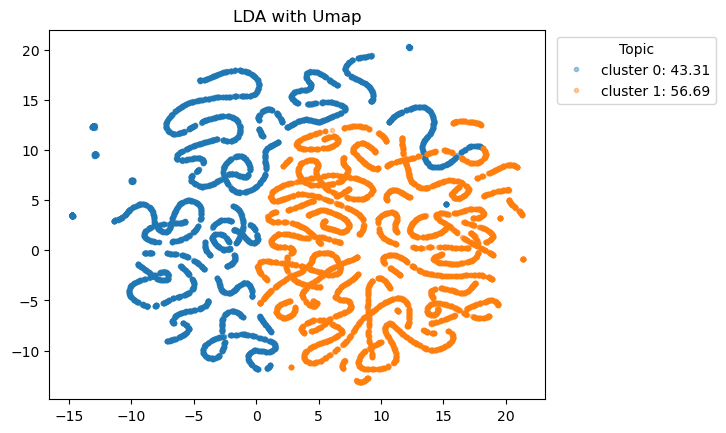

In [55]:
plot_embeddings(embedding_umap_lda, labels_lda,"LDA with Umap")

pca explained_variance_  [1.89457816e-01 4.19839039e-08]
pca explained_variance_ratio_  [9.99999778e-01 2.21600225e-07]


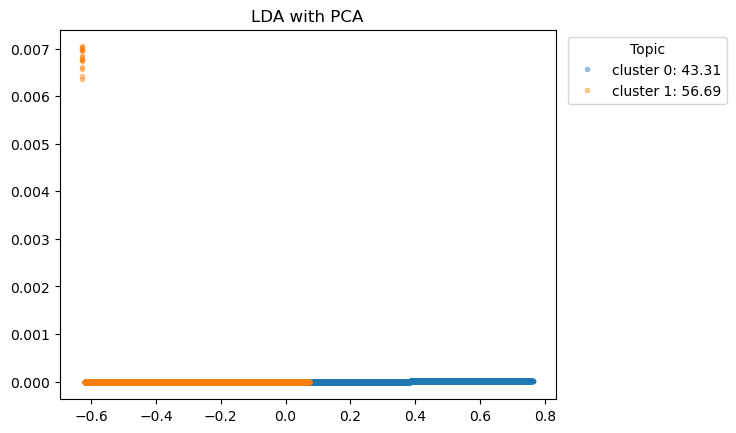

In [56]:
embedding_pca_lda = reduce_pca(embedding_lda  )
plot_embeddings(embedding_pca_lda, labels_lda,"LDA with PCA")

D:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


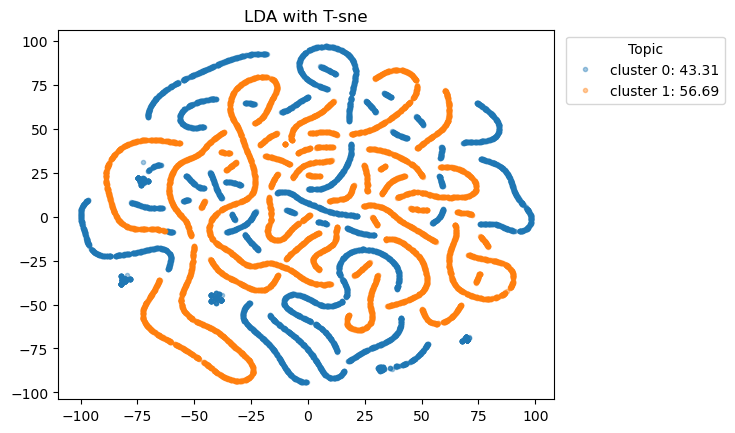

In [57]:
embedding_tsne_lda = reduce_tsne(embedding_lda  )
plot_embeddings(embedding_tsne_lda, labels_lda,"LDA with T-sne")

In [58]:
print("Silhouette score:" )
print("LDA          : ", silhouette_score(embedding_lda, labels_lda) )

print("LDA with PCA : ", silhouette_score(embedding_pca_lda, labels_lda) )

print("LDA with TSNE : ", silhouette_score(embedding_tsne_lda, labels_lda) )

print("LDA with UMAP : ", silhouette_score(embedding_umap_lda, labels_lda) )

Silhouette score:
LDA          :  0.6382715351776962
LDA with PCA :  0.638271535177719
LDA with TSNE :  0.024088165
LDA with UMAP :  0.29364663


In [ ]:
!pip install -U sentence-transformers

     |████████████████████████████████| 81kB 3.5MB/s 
     |████████████████████████████████| 2.3MB 24.3MB/s 
     |████████████████████████████████| 1.2MB 35.0MB/s 
     |████████████████████████████████| 3.3MB 35.6MB/s 
     |████████████████████████████████| 901kB 28.9MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-1.2.0-cp37-none-any.whl size=123339 sha256=9b9344c28f964dc7b3c77033dfe79fcda667a30b42377d16ed273c342ab3fc13
  Stored in directory: /root/.cache/pip/wheels/0f/06/f7/faaa96fdda87462b4fd5c47b343340e9d5531ef70d0eef8242
Successfully built sentence-transformers
